In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from scipy.optimize import curve_fit
from tqdm.auto import trange
from tqdm import tqdm
import Metropolis_Algorithm as MA

import importlib

importlib.reload(MA)

# Setting Constants
x_0 = 0
y_0 = 0
t_i = 0
t_f = 8

mass = 1
steps = 150  # Reduced from 800 - fewer points to update
numb_paths = 1000

times = np.linspace(t_i, t_f, steps)
dt = times[1] - times[0]

In [2]:
# Potential
def x_potential(x):
    return 1 / 2 * x ** 2


def y_potential(x):
    return 1000 * x ** 4


def ho_analytic_pdf(x):
    return (1 / np.sqrt(np.pi)) * np.exp(-x ** 2)


def residual_calculator(x_values, model, model_parameters, y_values, y_errors):
    theoretical_values = model(x_values, *model_parameters)
    residuals = (y_values - theoretical_values) / y_errors
    return residuals

In [3]:
paths_x = np.array([
    MA.Pos_Gen(0.0, 0.0, steps, dt)
    for _ in range(numb_paths)
])

paths_orig = paths_x.copy()

In [4]:
C = 1.8437008005694266
mid = paths_x.shape[1] // 2
thin = 10
sigma_prop = C * np.sqrt(dt)

# Thermalization
print("Thermalizing...")
for sweep in trange(500, desc="Thermalising", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if sweep % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

# Sampling
print("\nSampling...")
samples_x = []

for k in trange(5000, desc="Sampling", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if k % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

    if k % thin == 0:
        samples_x.append(paths_x[:, -1].copy())

samples_x = np.concatenate(samples_x)

# Compute PDF
x_bins = np.linspace(-2, 2, 201)
pdf_unnormalised_x, bin_edges_x = np.histogram(samples_x, bins=x_bins)

x_centres = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])
dx = np.diff(x_bins)[0]

pdf_x = pdf_unnormalised_x / np.sum(pdf_unnormalised_x * dx)

# Analytic PDF
phi_sq_analytic_x = (1 / np.sqrt(np.pi)) * np.exp(-x_centres ** 2)
phi_sq_analytic_x /= np.sum(phi_sq_analytic_x * dx)

# Statistics
mean_square_x = np.mean(samples_x**2)
rms = np.sqrt(mean_square_x)
std = np.std(samples_x)

print("\n------ Results ------")
print(f"Numerical PDF area: {np.sum(pdf_x * dx):.5f}")
print(f"Analytic PDF area: {np.sum(phi_sq_analytic_x * dx):.5f}")
print(f"Standard deviation: {std:.4f} (expected ≈ 0.707)")
print(f"Root mean square: {rms:.4f} (expected ≈ 0.707)")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_centres, pdf_x, label='Path integral estimate', s=10, alpha=0.6, color = 'grey')
plt.plot(x_centres, phi_sq_analytic_x, 'black',linestyle = '--', linewidth=2, label=r'Analytic $|\phi_0(x)|^2$')
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.legend(fontsize=11)
plt.title('Ground State Wavefunction: Path Integral vs Analytic')

plt.tight_layout()
plt.show()

Thermalizing...


Thermalising:  37%|███▋      | 186/500 [00:00<00:00, 995.98it/s] 

Endpoint acceptance ≈ 0.550
Endpoint acceptance ≈ 0.496


Thermalising:  40%|████      | 200/500 [00:00<00:00, 1043.13it/s]

Endpoint acceptance ≈ 0.526


Thermalising:  81%|████████  | 405/500 [00:00<00:00, 1012.91it/s]

Endpoint acceptance ≈ 0.532
Endpoint acceptance ≈ 0.526


Thermalising: 100%|██████████| 500/500 [00:00<00:00, 1017.40it/s]



Sampling...


Sampling:   0%|          | 8/5000 [00:00<00:04, 1001.80it/s]

Endpoint acceptance ≈ 0.558


Sampling:   4%|▍         | 204/5000 [00:00<00:05, 936.26it/s] 

Endpoint acceptance ≈ 0.513
Endpoint acceptance ≈ 0.522


Sampling:   6%|▌         | 312/5000 [00:00<00:04, 1111.08it/s]

Endpoint acceptance ≈ 0.505


Sampling:  10%|█         | 516/5000 [00:00<00:04, 1083.91it/s]

Endpoint acceptance ≈ 0.505
Endpoint acceptance ≈ 0.514


Sampling:  12%|█▏        | 615/5000 [00:00<00:04, 1030.04it/s]

Endpoint acceptance ≈ 0.514


Sampling:  16%|█▌        | 811/5000 [00:00<00:03, 1112.61it/s]

Endpoint acceptance ≈ 0.524
Endpoint acceptance ≈ 0.523


Sampling:  18%|█▊        | 914/5000 [00:00<00:04, 945.19it/s] 

Endpoint acceptance ≈ 0.546


Endpoint acceptance ≈ 0.537


Sampling:  24%|██▍       | 1202/5000 [00:01<00:04, 871.35it/s] 

Endpoint acceptance ≈ 0.510
Endpoint acceptance ≈ 0.517


Sampling:  26%|██▋       | 1318/5000 [00:01<00:04, 916.53it/s] 

Endpoint acceptance ≈ 0.529


Sampling:  30%|███       | 1515/5000 [00:01<00:03, 1010.10it/s]

Endpoint acceptance ≈ 0.547
Endpoint acceptance ≈ 0.525


Sampling:  32%|███▏      | 1612/5000 [00:01<00:03, 1070.07it/s]

Endpoint acceptance ≈ 0.520


Sampling:  36%|███▋      | 1818/5000 [00:01<00:02, 1234.78it/s]

Endpoint acceptance ≈ 0.516
Endpoint acceptance ≈ 0.554


Sampling:  38%|███▊      | 1921/5000 [00:01<00:02, 1167.04it/s]

Endpoint acceptance ≈ 0.495


Sampling:  42%|████▏     | 2121/5000 [00:01<00:02, 1169.62it/s]

Endpoint acceptance ≈ 0.507
Endpoint acceptance ≈ 0.538


Sampling:  44%|████▍     | 2217/5000 [00:02<00:02, 1143.67it/s]

Endpoint acceptance ≈ 0.528


Sampling:  56%|█████▋    | 2820/5000 [00:02<00:01, 1099.43it/s]

Endpoint acceptance ≈ 0.514


Sampling:  60%|██████    | 3017/5000 [00:02<00:01, 1160.43it/s]

Endpoint acceptance ≈ 0.533
Endpoint acceptance ≈ 0.525


Sampling:  62%|██████▏   | 3117/5000 [00:02<00:01, 1169.87it/s]

Endpoint acceptance ≈ 0.517


Sampling:  66%|██████▋   | 3319/5000 [00:03<00:01, 1123.50it/s]

Endpoint acceptance ≈ 0.549
Endpoint acceptance ≈ 0.528


Sampling:  68%|██████▊   | 3416/5000 [00:03<00:01, 1059.76it/s]

Endpoint acceptance ≈ 0.530


Sampling:  72%|███████▏  | 3623/5000 [00:03<00:01, 1090.55it/s]

Endpoint acceptance ≈ 0.541
Endpoint acceptance ≈ 0.522


Sampling:  90%|█████████ | 4523/5000 [00:04<00:00, 1100.03it/s]

Endpoint acceptance ≈ 0.497
Endpoint acceptance ≈ 0.533


Sampling:  92%|█████████▎| 4625/5000 [00:04<00:00, 1042.04it/s]

Endpoint acceptance ≈ 0.519


Sampling:  96%|█████████▋| 4822/5000 [00:04<00:00, 1164.15it/s]

Endpoint acceptance ≈ 0.550
Endpoint acceptance ≈ 0.493


Sampling:  97%|█████████▋| 4866/5000 [00:04<00:00, 1093.49it/s]

# Paths Plot

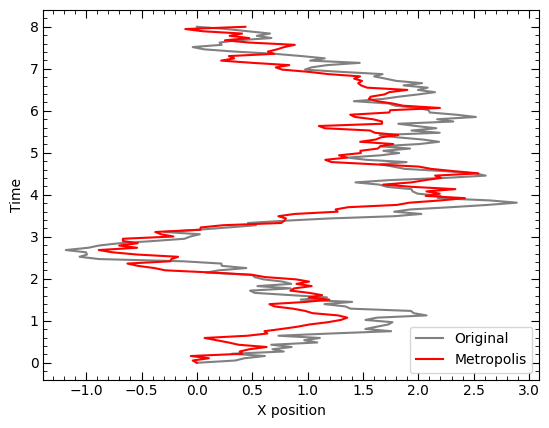

In [6]:
pc_savepath_paths_fig = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\Paths.svg"
laptop_savepath_paths_fig = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\Paths.svg"
plt.figure(1)

plt.plot(paths_orig[3],times, color = 'grey', label = "Original")
plt.plot(paths_x[3],times, color = 'red',label = "Metropolis")

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.xlabel('X position')
plt.ylabel('Time')
plt.legend(loc = "lower right")


plt.savefig(laptop_savepath_paths_fig, bbox_inches='tight')

plt.show()

# Action Plot

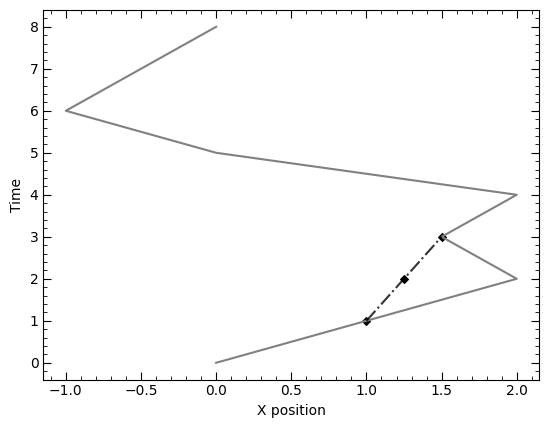

In [7]:
x_position_orig = [0,1,2,1.5,2,0,-1,-0.5,0]
x_position_new = [1,1.25,1.5]
time = [0,1,2,3,4,5,6,7,8]
time_change = [1,2,3]

pc_savepath_delta_S = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\delta_S.svg"
laptop_savepath_delta_S = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\delta_S.svg"
plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.plot(x_position_orig, time, label = "original", color = 'grey')
plt.plot(x_position_new, time_change, linestyle = "-.",label = "Change", color = "black", alpha = 0.8)
plt.scatter(x_position_new, time_change, color = "black", s = 15, marker = "D")

plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(laptop_savepath_delta_S, bbox_inches='tight')
plt.show()

# Brownian Bridge Plot

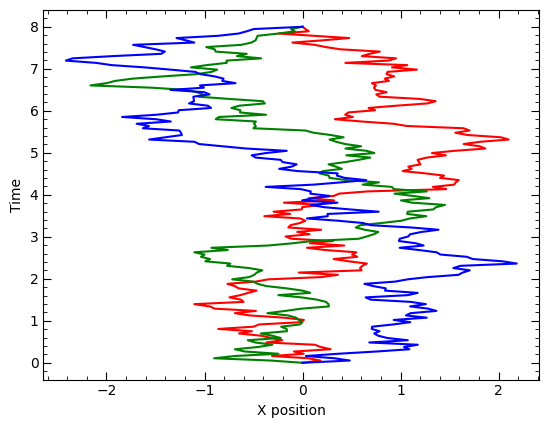

In [9]:
pc_savepath_bridge = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\bridge.svg"
laptop_savepath_bridge = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\bridge.svg"

colors = ['red', 'green', 'blue']

plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

for i in range (3):
    plt.plot(paths_orig[i+20], times, colors[i])


plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(laptop_savepath_bridge, bbox_inches='tight')
plt.show()

# Combined Bridge and action plot

In [ ]:
# Combined Plot
pc_savepath_combined = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\combined.svg"
laptop_savepath_combined = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\combined.svg"